# Support Vector Machine

## Linear Support Vector Machine

### Import Library Required

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

### Make Fake Data

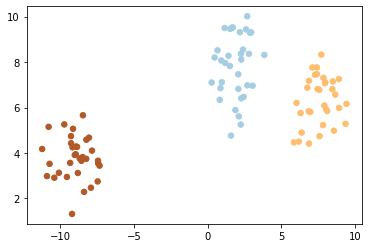

In [28]:
X, y = make_blobs(n_samples=100, centers=3, random_state=20)
# X, y = make_classification(n_samples = 100, n_features=2,
#                                 n_redundant=0, n_informative=2,
#                                 n_clusters_per_class=1, flip_y = 0.1,
#                                 class_sep = 0.5, n_classes=2)

plt.scatter(X[:,0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)

### Make Function to Plot Decision Boundaries
This function just working for `n_features = 2`

In [26]:
def make_plot(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf.fit(X_train, y_train)
    
    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#cfcf1f', '#000000', '#00CC00', '#0000CC']
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])
    cmap_light = ListedColormap(color_list_light[0:numClasses])

    plt.figure(figsize=(9,7))
    
    plt.scatter(X[:,0], X[:, 1], s=30, c=y, cmap=cmap_bold)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.arange(xlim[0], xlim[1], 0.03)
    yy = np.arange(ylim[0], ylim[1], 0.03)

    XX, YY = np.meshgrid(xx, yy)
    xy = np.c_[XX.ravel(), YY.ravel()]

    P = clf.predict(xy).reshape(XX.shape)
    ax.contourf(XX,YY,P, cmap=cmap_light, alpha=0.3);
    
    if numClasses == 2:
        Z = clf.decision_function(xy).reshape(XX.shape)
        ax.contour(XX,YY,Z, colors='k', alpha=0.5, levels=([-1,0,1]), linestyles=['--', '-', '--'])
    else:
        ax.contour(XX,YY,P, colors='k', alpha=0.5, linestyles='--')
    
    accuracy_test = clf.score(X_test, y_test)
    accuracy_train = clf.score(X_train, y_train)
    C = clf.get_params()['C']
    plt.title('Accuracy Test Data: {:.3}     Accuracy Train Data: {:.3} \n C : {}'.format(
        accuracy_test, accuracy_train, C), size=15)

### Make Model

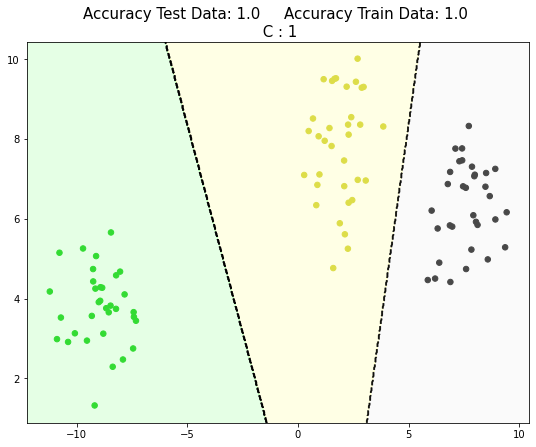

In [30]:
clf = SVC(kernel='linear', C=1)
make_plot(clf, X, y)

### Application to Cancer Dataset

In [325]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='linear', C=1).fit(X_train,y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.96
